In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

excel_file_path = "./test.csv"
df = pd.read_csv(excel_file_path, encoding="latin-1")
df.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
32,924,3,"Dean, Mrs. Bertram (Eva Georgetta Light)",female,33.0,1,2,C.A. 2315,20.5750,NaN,S
309,1201,3,"Hansen, Mrs. Claus Peter (Jennie L Howard)",female,45.0,1,0,350026,14.1083,NaN,S
360,1252,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.5500,NaN,S
270,1162,1,"McCaffry, Mr. Thomas Francis",male,46.0,0,0,13050,75.2417,C6,C
202,1094,1,"Astor, Col. John Jacob",male,47.0,1,0,PC 17757,227.5250,C62 C64,C


<Axes: xlabel='Sex', ylabel='count'>

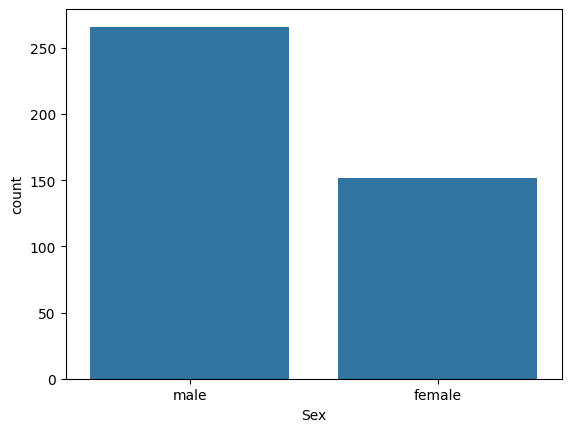

In [13]:
sns.countplot(x=df["Sex"])

<Axes: xlabel='Pclass', ylabel='count'>

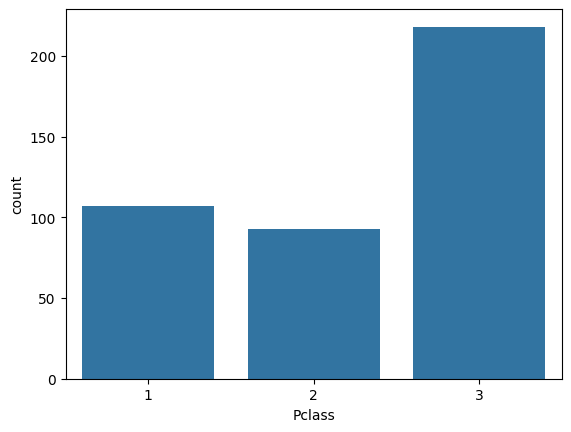

In [14]:
sns.countplot(x=df["Pclass"])

<Axes: ylabel='count'>

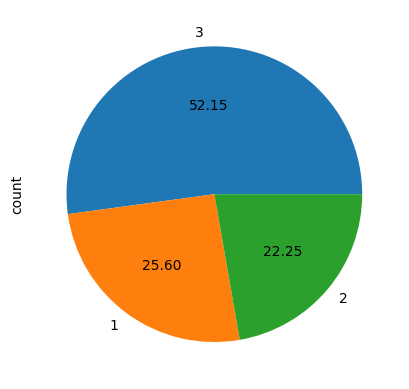

In [16]:
df["Pclass"].value_counts().plot(kind="pie", autopct="%.2f")

(array([16., 16., 71., 97., 43., 37., 25., 17.,  9.,  1.]),
 array([ 0.17 ,  7.753, 15.336, 22.919, 30.502, 38.085, 45.668, 53.251,
        60.834, 68.417, 76.   ]),
 <BarContainer object of 10 artists>)

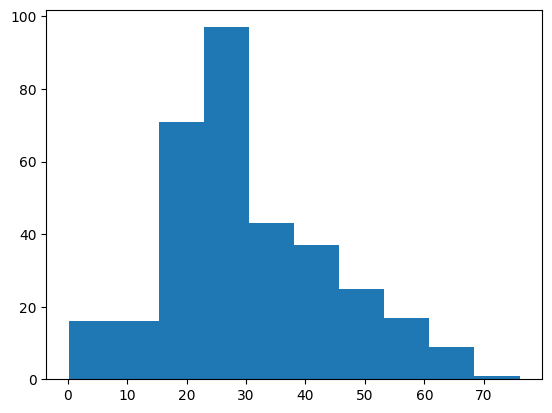

In [23]:
plt.hist(df["Age"], bins=10)

<Axes: xlabel='Age', ylabel='Density'>

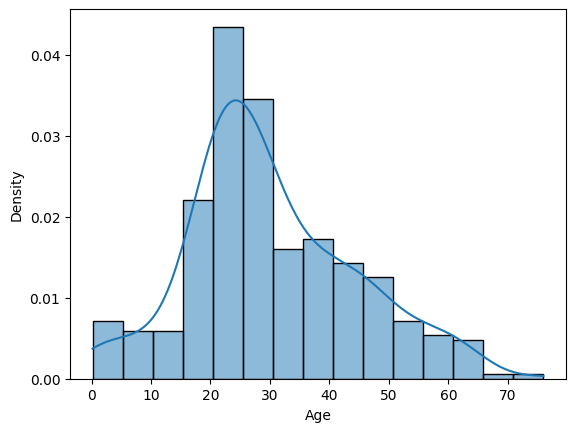

In [26]:
sns.histplot(data=df["Age"], kde=True, stat="density")

<Axes: xlabel='Age'>

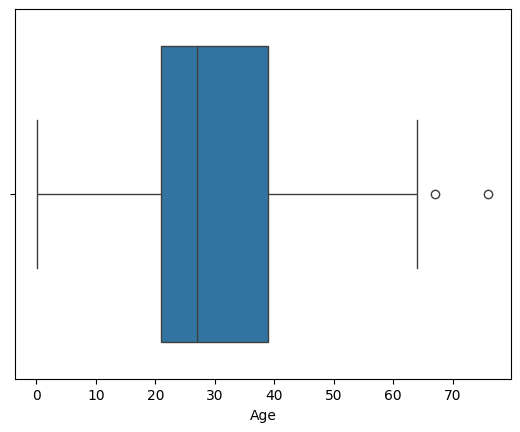

In [28]:
sns.boxplot(x=df["Age"])